In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from datetime import datetime
print("Done")

Done


In [42]:
h_err = 0.1
data = pd.read_csv("../data/data.csv")
data["y"] = np.log(data.h1 / data.h2)
data["y_err"] = np.log((data.h1 + h_err) / (data.h2 - h_err)) - data.y
data["x"] = data.t
data

,t,h1,h2,y,y_err,x
0,5,10.4,1.5,1.936341,0.078562,5
1,10,10.7,1.2,2.187922,0.096314,10
2,15,10.8,1.1,2.284236,0.104527,15
3,20,10.9,0.9,2.494123,0.126916,20
4,25,10.8,0.8,2.602690,0.142748,25
5,30,10.8,0.7,2.736221,0.163367,30
6,35,10.7,0.5,3.063391,0.232446,35


b = 1.7869602339426385 +/- 0.05134754336642135 (2.8734575281024193%)
1.201155696772782 0.277280202786667


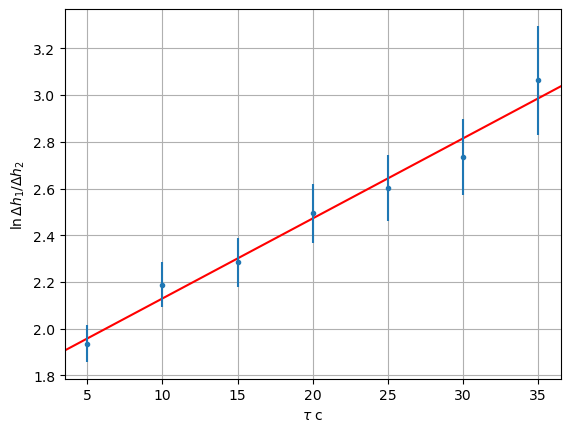

In [60]:
pp, V = np.polyfit(data.x, data.y, 1, cov=True)
k, b = pp
k_err, b_err = np.sqrt(V[0][0]), np.sqrt(V[1][1])
plt.grid()
plt.axline([min(data.x), min(data.x) * k + b], [max(data.x), max(data.x) * k + b], color='r')
plt.errorbar(data.x, data.y, yerr = data.y_err, fmt='.')
plt.xlabel("$\\tau$ с")
plt.ylabel("$\\ln\\Delta h_1 / \\Delta h_2$")
print(f"b = {b} +/- {b_err} ({b_err/b*100}%)")
y_err = data.y_err.min()
b_err = np.hypot(b_err, y_err)
g = np.exp(b) / (np.exp(b) - 1)
g_err = np.exp(b + b_err) / (np.exp(b - b_err) - 1) - g
print(g, g_err)
plt.savefig("../img/plot.png", dpi=400)

1.9927464470386334
1.5811740208466436
0.41157242619198975


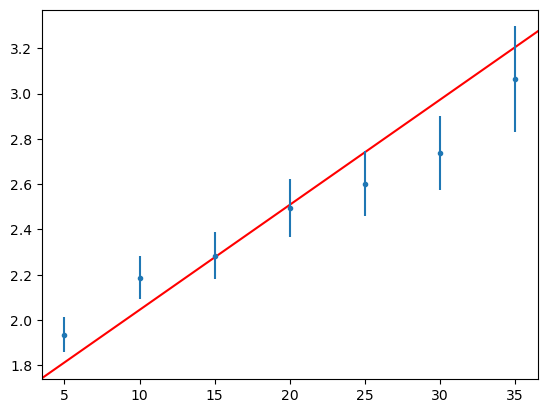

In [52]:
y = list(data.y)
for i in range(0, 3):
    y[i] += data.y_err[i]
for i in range(4, 7):
    y[i] -= data.y_err[i]
pp, V = np.polyfit(data.x, y, 1, cov=True)
k, b1 = pp
k_err, b_err = np.sqrt(V[0][0]), np.sqrt(V[1][1])
print(b1)

y = list(data.y)
for i in range(0, 3):
    y[i] -= data.y_err[i]
for i in range(4, 7):
    y[i] += data.y_err[i]
    
pp, V = np.polyfit(data.x, y, 1, cov=True)
k, b2 = pp
k_err, b_err = np.sqrt(V[0][0]), np.sqrt(V[1][1])
print(b2)

plt.axline([min(data.x), min(data.x) * k + b2], [max(data.x), max(data.x) * k + b2], color='r')
plt.errorbar(data.x, data.y, yerr = data.y_err, fmt='.')

print(b1-b2)